In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"



In [12]:
# Evolution of logistic map to invariant density

n_bins = 100
sites = np.arange(0., 1., 1./n_bins)
uniform_density = np.ones(n_bins)
invariant_density = 1./ (np.pi * np.sqrt(sites * (1. - sites)))

logistic_map = lambda x, r: r * x * (1. - x)
perron_frobenius_logistic = lambda x, f: 1 / (4 * np.sqrt(1. - x) ) * (f(0.5 - 0.5 * np.sqrt(1.-x)) + f(0.5+0.5 * np.sqrt(1.-x)))


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


In [15]:
def draw_evolution(initial_density, f, perron_frobenius, n_updates=100, invariant_density=None):
    fig, ax = plt.subplots()
    xdata, ydata = sites, initial_density
    ln, = plt.plot([], [], 'ro')

    def init():
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 3)
        return ln,
    
    def update(frame, f):
        ydata = f(sites)
        #print(ydata)
        
        pf = perron_frobenius(xdata, f)
        f = lambda x: pf[int(x)]
        
        ln.set_data(xdata, ydata)
        return ln,

    ani = FuncAnimation(fig, update, frames=n_updates, fargs=(f,),
                        init_func=init)
    return ani


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


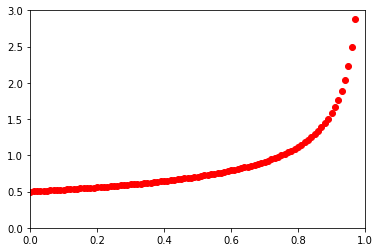

In [17]:
ani = draw_evolution(uniform_density, lambda x: 1./(2*np.sqrt(1.-x)), perron_frobenius_logistic)
HTML(ani.to_html5_video())